In [10]:
import os
import glob
import random

import numpy as np
from tqdm.notebook import tqdm
import pydicom
import nrrd
import matplotlib.pyplot as plt

In [20]:
def write_back_nrrd(path_file: str, data: np.ndarray) -> None:
    """
    """
    nrrd.write(path_file, data)

In [78]:
path_data = os.path.join(os.getcwd(), '..', 'data', 'lv_dataset', 'HeartReorDataset')

In [355]:
path = os.path.join(os.getcwd(), '..', 'data', 'segmentation')

files = glob.glob(os.path.join(path, '*.nrrd'))

In [356]:
files

['C:\\ELTE\\fourth_semester\\Medisolab\\notebooks\\..\\data\\segmentation\\1.nrrd',
 'C:\\ELTE\\fourth_semester\\Medisolab\\notebooks\\..\\data\\segmentation\\10.nrrd',
 'C:\\ELTE\\fourth_semester\\Medisolab\\notebooks\\..\\data\\segmentation\\100.nrrd',
 'C:\\ELTE\\fourth_semester\\Medisolab\\notebooks\\..\\data\\segmentation\\101.nrrd',
 'C:\\ELTE\\fourth_semester\\Medisolab\\notebooks\\..\\data\\segmentation\\102.nrrd',
 'C:\\ELTE\\fourth_semester\\Medisolab\\notebooks\\..\\data\\segmentation\\10_Segmentation.nrrd',
 'C:\\ELTE\\fourth_semester\\Medisolab\\notebooks\\..\\data\\segmentation\\11.nrrd',
 'C:\\ELTE\\fourth_semester\\Medisolab\\notebooks\\..\\data\\segmentation\\11_Segmentation.nrrd',
 'C:\\ELTE\\fourth_semester\\Medisolab\\notebooks\\..\\data\\segmentation\\12.nrrd',
 'C:\\ELTE\\fourth_semester\\Medisolab\\notebooks\\..\\data\\segmentation\\13.nrrd',
 'C:\\ELTE\\fourth_semester\\Medisolab\\notebooks\\..\\data\\segmentation\\14.nrrd',
 'C:\\ELTE\\fourth_semester\\Medisola

In [427]:
index = 11

path_image = os.path.join(path, f'{index}.nrrd')
path_mask = os.path.join(path, f'{index}_Segmentation.nrrd')

(64, 64, 64)


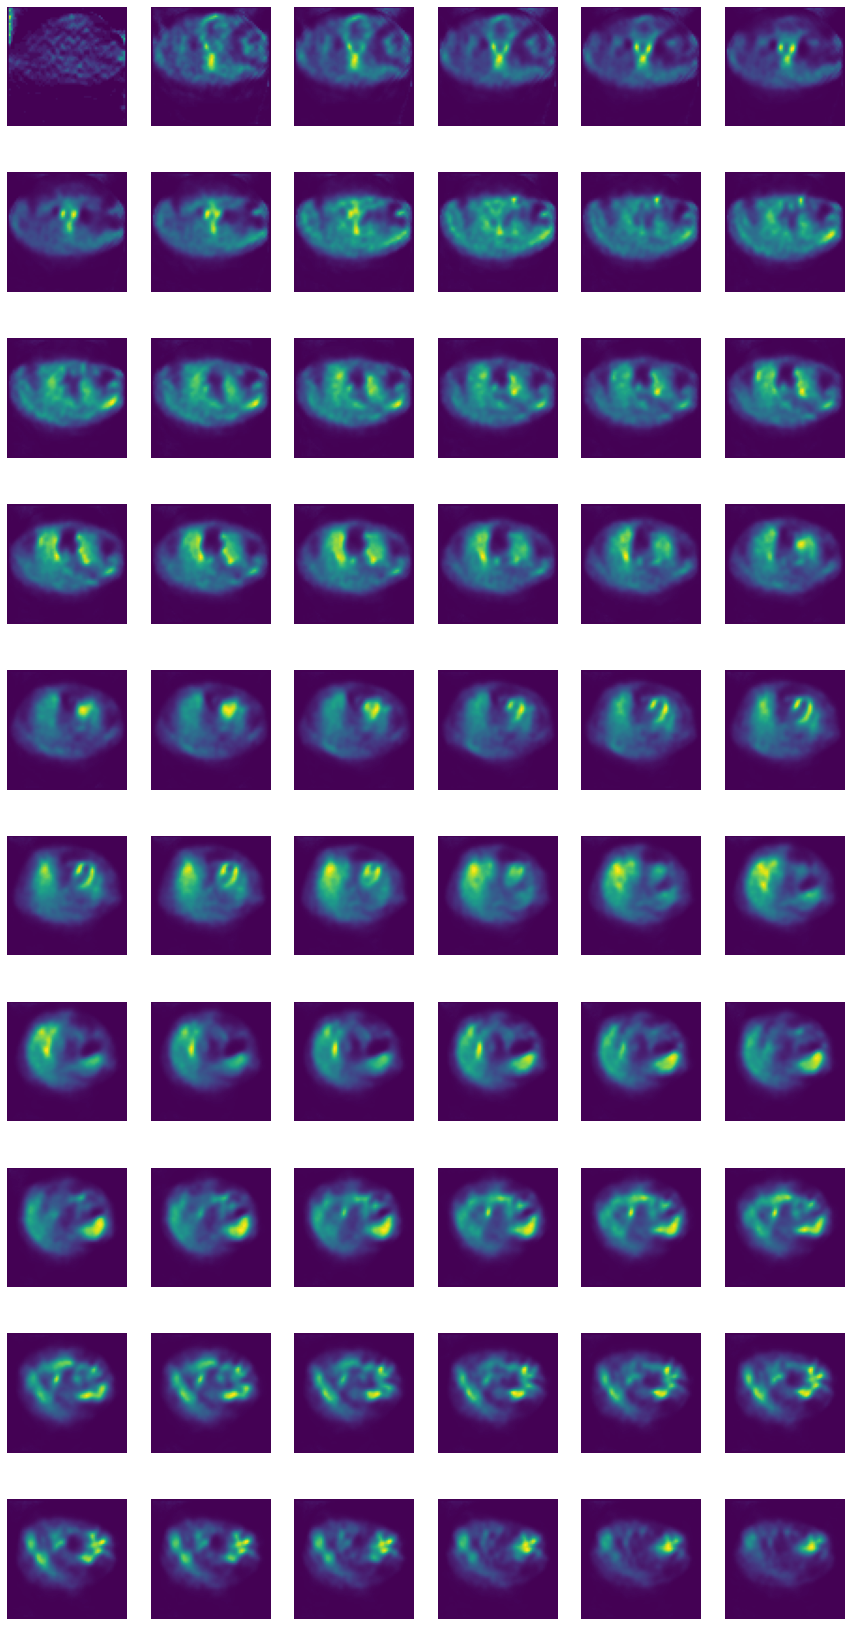

In [428]:
data, header = nrrd.read(path_image)

print(data.shape)

#data = data.swapaxes(1, 2).swapaxes(0, 1)
#data = data.swapaxes(0, 2)

fig, axes = plt.subplots(nrows=10, ncols=6, figsize=(15, 30))

for i, (img, ax) in enumerate(zip(data, axes.flatten())):
    
    if i < data.shape[2]:
        ax.imshow(img)
        ax.axis('off')
        
plt.show()

In [419]:
write_back_nrrd(path_image, data)

(64, 64, 64)


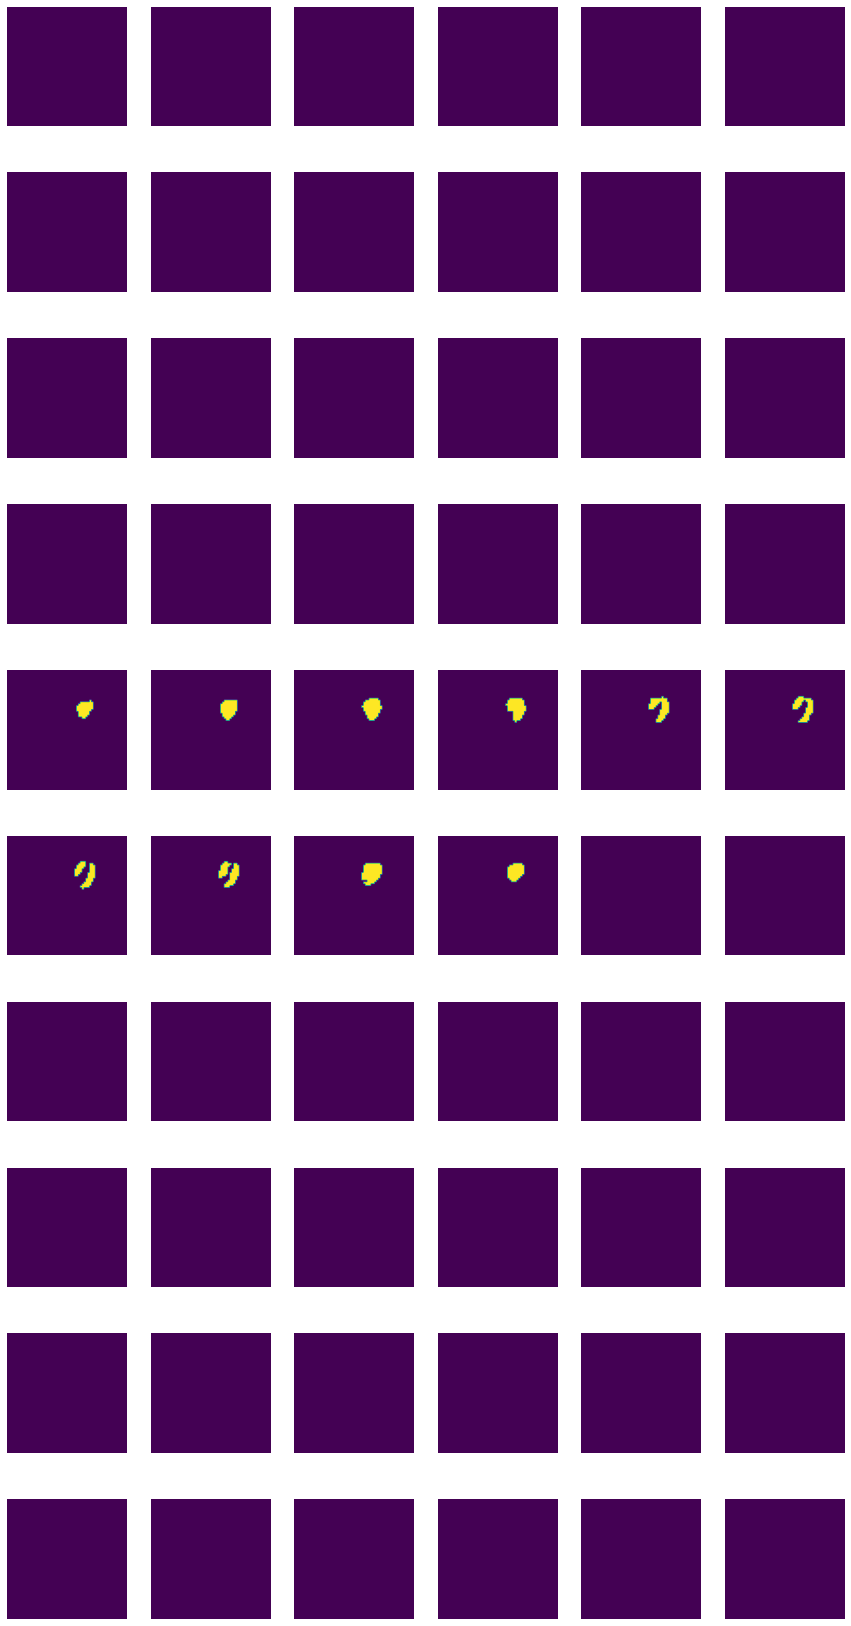

In [430]:
data, header = nrrd.read(path_mask)

print(data.shape)

#data = data.swapaxes(1, 2).swapaxes(0, 1)
#data = data.swapaxes(0, 2)

#data[data == 2] = 0

fig, axes = plt.subplots(nrows=10, ncols=6, figsize=(15, 30))

for i, (img, ax) in enumerate(zip(data, axes.flatten())):
    
    if i < data.shape[2]:
        ax.imshow(img)
        ax.axis('off')
        
plt.show()

In [420]:
write_back_nrrd(path_mask, data)

In [443]:
data.shape

(64, 64, 64)

In [447]:
data[data > 0].shape

(819,)

In [459]:
(data > 0).any(axis=(1, 2)).sum()

10

In [449]:
len(np.nonzero(data))

3

(128, 128, 128)


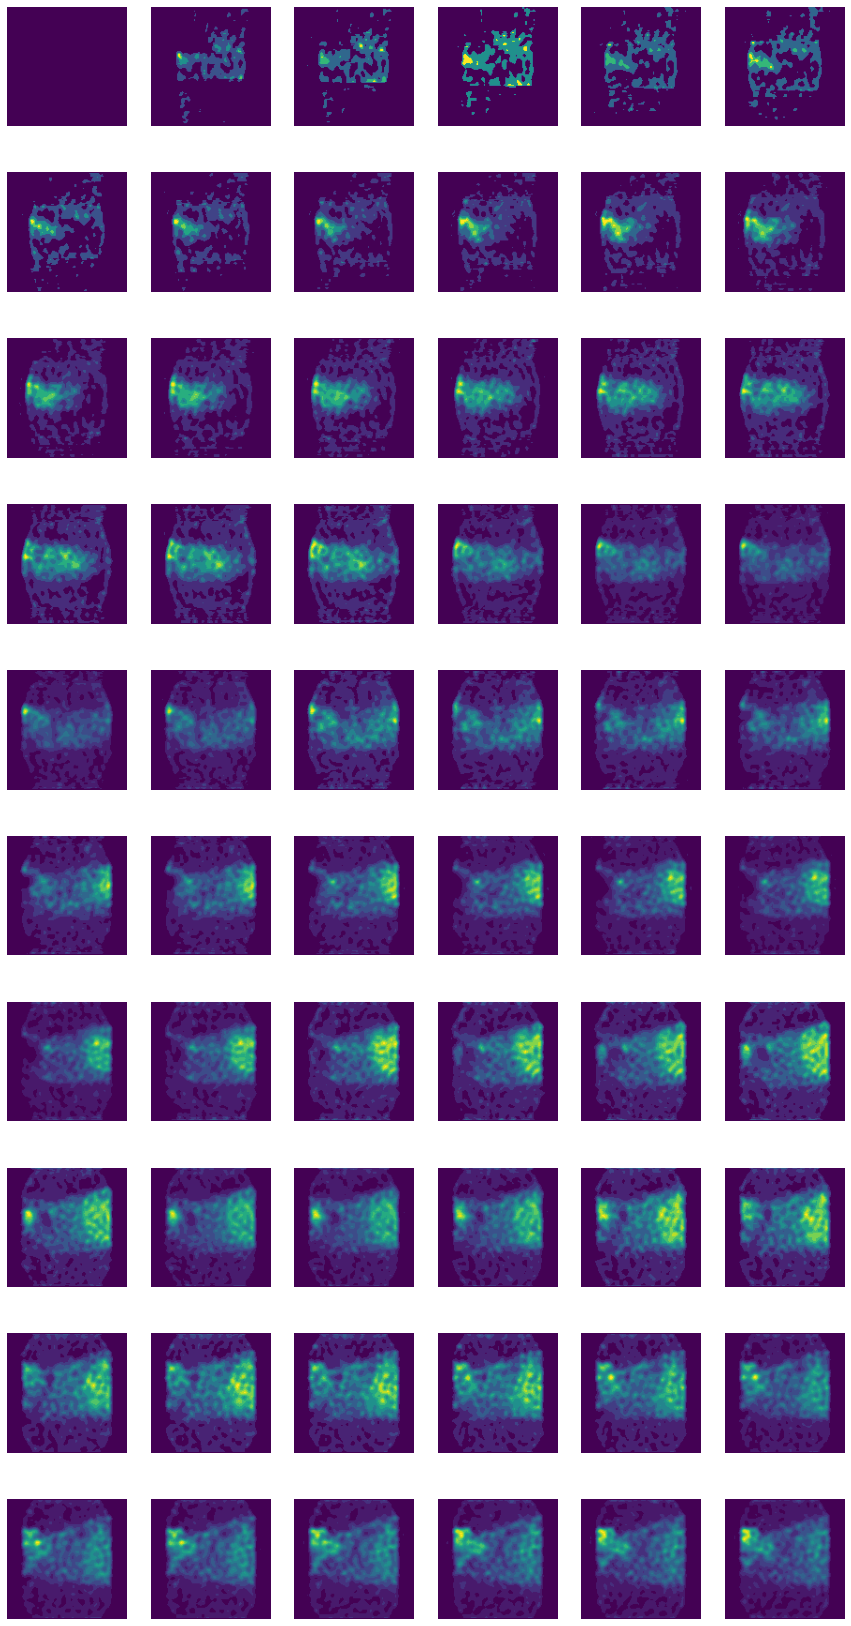

In [351]:
index = 5

path_nrrd = os.path.join(path, f'{index}.nrrd')

data, header = nrrd.read(path_nrrd)

print(data.shape)

#data = data.swapaxes(1, 2).swapaxes(0, 1)
#data = data.swapaxes(0, 2)

fig, axes = plt.subplots(nrows=10, ncols=6, figsize=(15, 30))

for i, (img, ax) in enumerate(zip(data, axes.flatten())):
    
    if i < data.shape[2]:
        ax.imshow(img)
        ax.axis('off')
        
plt.show()

In [354]:
write_back_nrrd(path_nrrd, data)

In [ ]:
"""gated: 4, 51, 54"""

(128, 128, 128)


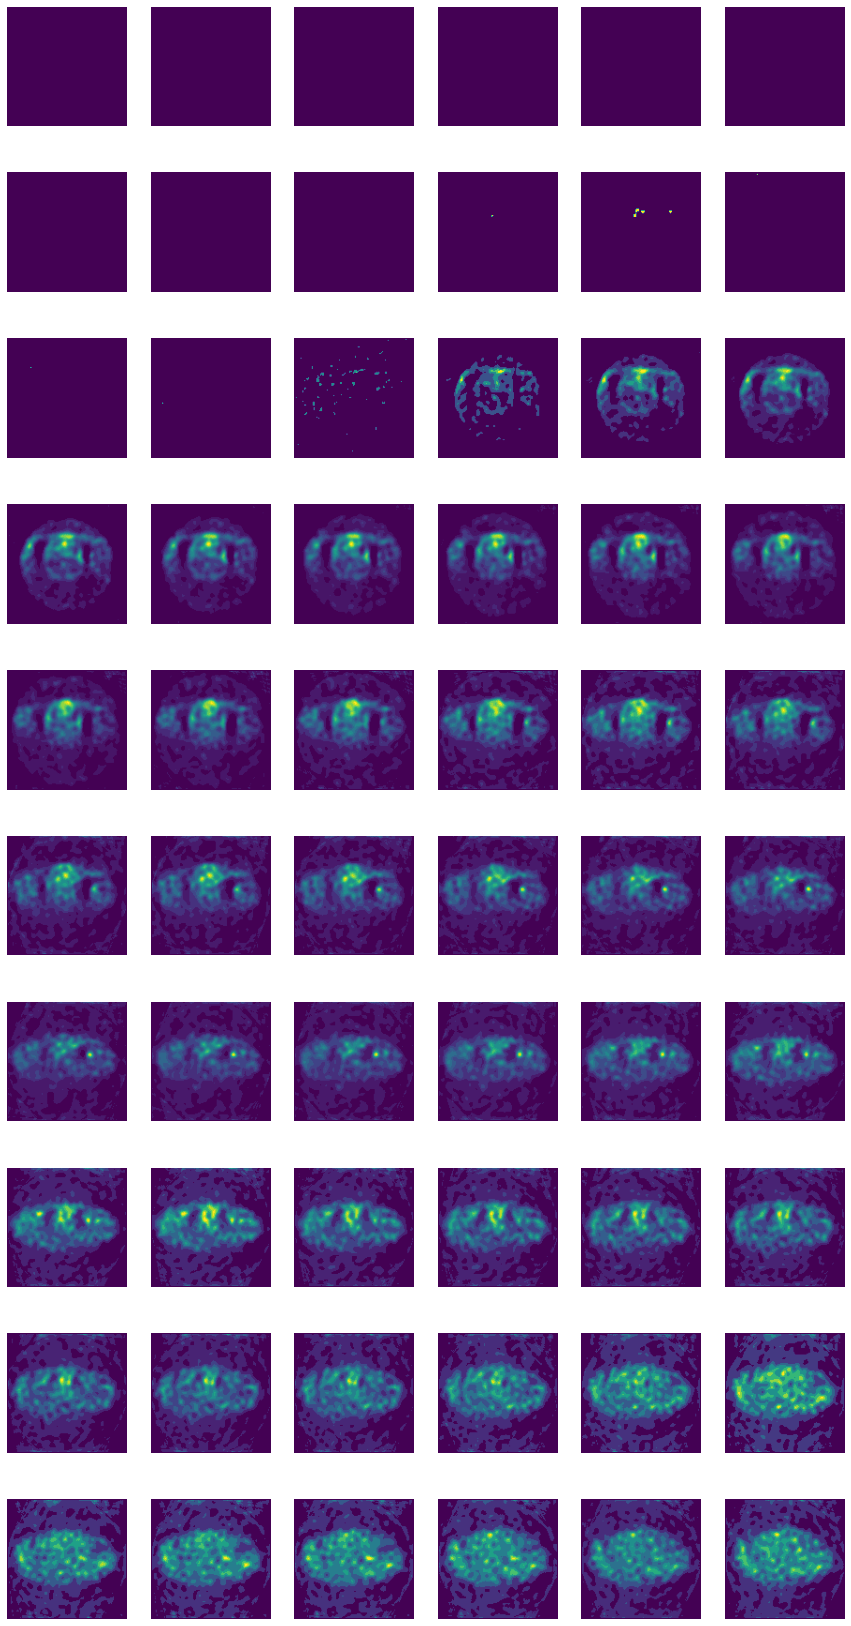

In [336]:
start = 5


path_cd = os.path.join(os.getcwd(), '..', 'data', 'cleaned_data', 'cleaned_data')


for index in range(start, 103):

    path_dcm = os.path.join(path_cd, f'{index}.dcm')

    data = pydicom.dcmread(path_dcm).pixel_array

    print(data.shape)

    #data = data.swapaxes(1, 2).swapaxes(0, 1)
    #data = data.swapaxes(1, 2)

    fig, axes = plt.subplots(nrows=10, ncols=6, figsize=(15, 30))

    for i, (img, ax) in enumerate(zip(data, axes.flatten())):

        if i < data.shape[2]:
            ax.imshow(img)
            ax.axis('off')

    plt.show()
    
    break

In [334]:
path_save = os.path.join(path, path_dcm.split(os.sep)[-1].replace('dcm', 'nrrd'))

write_back_nrrd(path_save, data)